#### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Datasets

In [2]:
train = pd.read_csv('../data/train_cleaned.csv')
test = pd.read_csv('../data/test_cleaned.csv')

In [3]:
train.head()

,Loan_ID,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Loan_Amount_Term_org,total_hh_inc,total_pp_hh,avg_inc_hh_d,...,Male,Graduate,Not Graduate,self_employed_No,self_employed_Unknown,self_employed_Yes,0,1,2,3
0,LP001002,0,5849,0.0,134500.0,1,360.0,5849.0,1,5849.000000,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,LP001003,1,4583,1508.0,128000.0,0,360.0,6091.0,3,2030.333333,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,LP001005,1,3000,0.0,66000.0,1,360.0,3000.0,1,3000.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,LP001006,1,2583,2358.0,120000.0,1,360.0,4941.0,2,2470.500000,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,LP001008,0,6000,0.0,141000.0,1,360.0,6000.0,1,6000.000000,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Checking collienearity and removing similar variables

Since we added a lot of features based on common variables, high multicollinearity is suspected. We need to eliminate highly corelated variables which have low correlation with Loan Status. These variables are noise in the data

In [12]:
upper = train.corr().where(np.triu(np.ones(train.corr().shape), k=1).astype(np.bool))

/tmp/ipykernel_252138/1918034925.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = train.corr().where(np.triu(np.ones(train.corr().shape), k=1).astype(np.bool))


<AxesSubplot:>

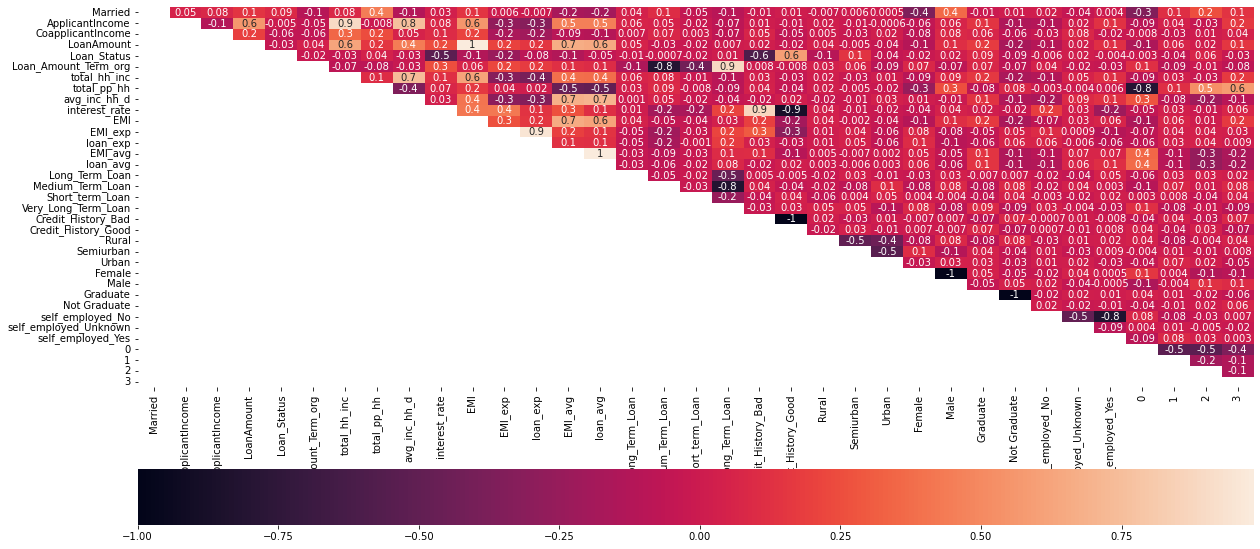

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(upper, annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

high correlation between:
    
- applicant income with loan amt, total_hh_inc, avg_hh_inc, 
- Loan amt with coapp inc, total_hh_inc
- LOng term loan with very long term loan
- med term loan with very long term loan
- credit history bad with credit history good
- rurual with semi urban
- semi urban with urban and rural
- female with male
- graduate with not graduate
- self employe no with self employed yes
- 0 with total_pp_hh


to remove - less correlated with loan_status
- applicant income
- total_hh_inc
- very long term loan
- credit histroy good
- female
- not graduate
- self employed yes
- 0


In [15]:
train.corr()['Loan_Status'].sort_values()

Credit_History_Bad      -0.595642
interest_rate           -0.525845
EMI_exp                 -0.233869
EMI                     -0.130666
EMI_avg                 -0.126653
Rural                   -0.100694
Not Graduate            -0.085884
loan_exp                -0.078722
CoapplicantIncome       -0.059187
loan_avg                -0.049899
Urban                   -0.043621
1                       -0.038740
LoanAmount              -0.031920
total_hh_inc            -0.031271
avg_inc_hh_d            -0.026178
3                       -0.026123
Loan_Amount_Term_org    -0.022549
Female                  -0.017987
Short_term_Loan         -0.017062
Long_Term_Loan          -0.014646
self_employed_No        -0.005857
ApplicantIncome         -0.004710
self_employed_Yes       -0.003700
0                       -0.003044
Medium_Term_Loan        -0.000663
Very_Long_Term_Loan      0.012728
self_employed_Unknown    0.015909
Male                     0.017987
total_pp_hh              0.042172
2             

#### Checking the distribution of the variables

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

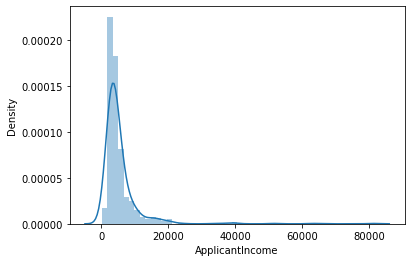

In [18]:
sns.distplot(train.ApplicantIncome)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

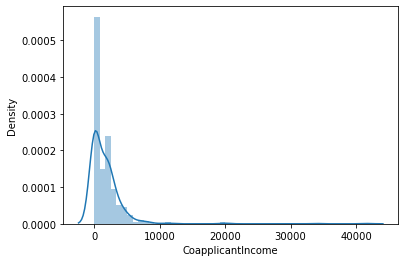

In [19]:
sns.distplot(train.CoapplicantIncome)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

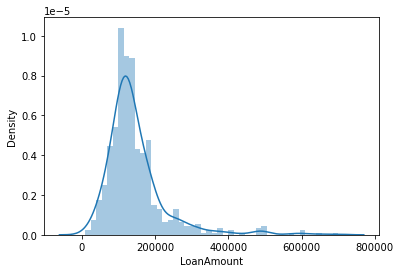

In [20]:
sns.distplot(train.LoanAmount)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_hh_inc', ylabel='Density'>

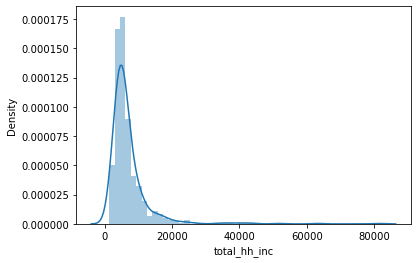

In [21]:
sns.distplot(train.total_hh_inc)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_inc_hh_d', ylabel='Density'>

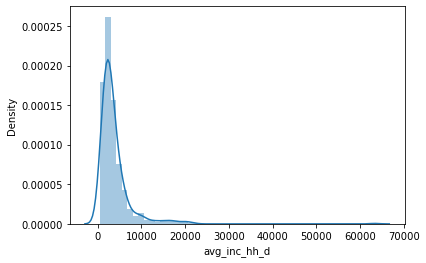

In [22]:
sns.distplot(train.avg_inc_hh_d)

In [23]:
##normalizing

train.ApplicantIncome = np.log(train.ApplicantIncome)
train.CoapplicantIncome = np.log(train.CoapplicantIncome + 1)  # Since some values are zero to avoid log 0 =infinity.
train.LoanAmount = np.log(train.LoanAmount)
train.total_hh_inc = np.log(train.total_hh_inc)
train.avg_inc_hh_d = np.log(train.avg_inc_hh_d)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

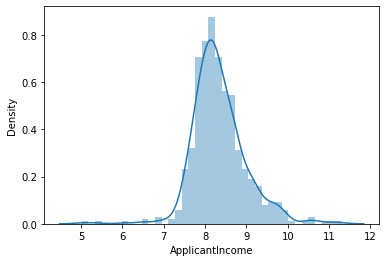

In [24]:
sns.distplot(train.ApplicantIncome)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

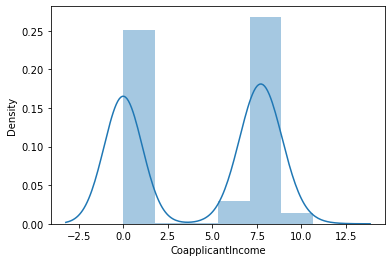

In [25]:
sns.distplot(train.CoapplicantIncome)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_hh_inc', ylabel='Density'>

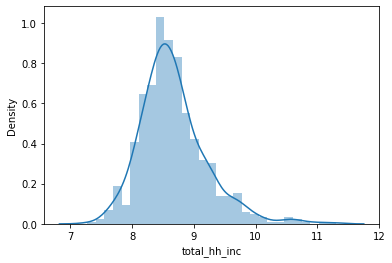

In [26]:
sns.distplot(train.total_hh_inc)

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

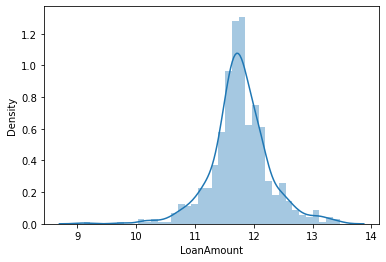

In [27]:
sns.distplot(train.LoanAmount)

##### Step wise removal of variables. Round 1

In [37]:
to_rmv = ['ApplicantIncome','total_hh_inc','Very_Long_Term_Loan','Credit_History_Good','Female','Not Graduate','self_employed_Yes','0']

In [38]:
train_2 = train.drop(to_rmv, axis = 1, inplace  = False)

In [39]:
test_2 = test.drop(to_rmv, axis = 1, inplace  = False)

/tmp/ipykernel_252138/3493976062.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))


<AxesSubplot:>

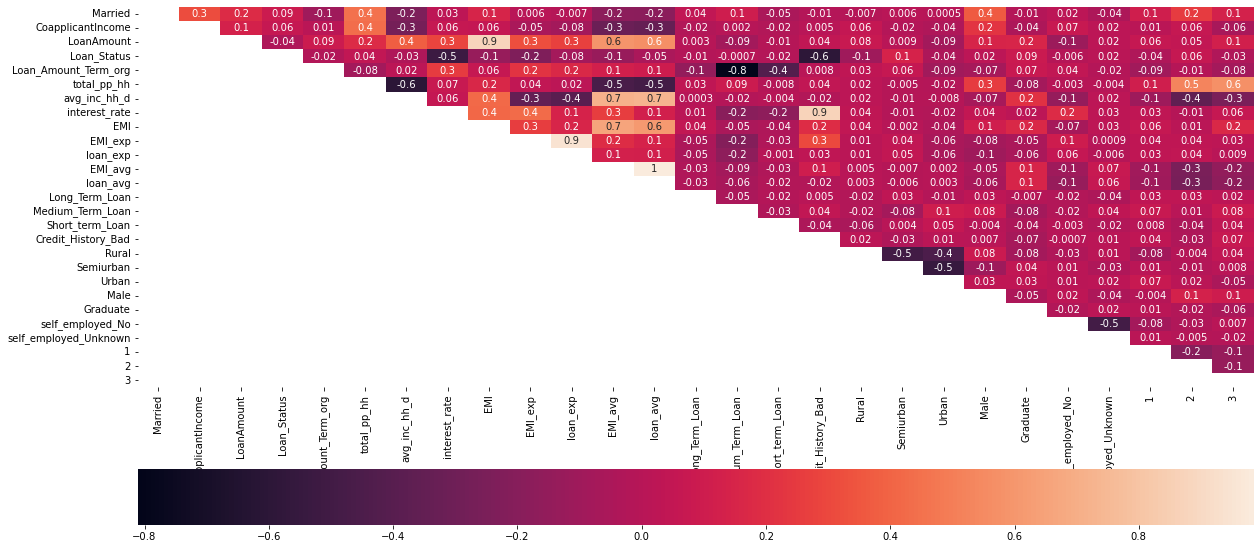

In [32]:
plt.figure(figsize = (20,10))
upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))
sns.heatmap(upper, annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

#### Round 2 of removing correlated variables

In [40]:
to_rmv = ['interest_rate','LoanAmount','total_pp_hh']

In [41]:
train_2 = train_2.drop(to_rmv, axis = 1, inplace  = False)
test_2 = test_2.drop(to_rmv, axis = 1, inplace  = False)

/tmp/ipykernel_252138/3493976062.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))


<AxesSubplot:>

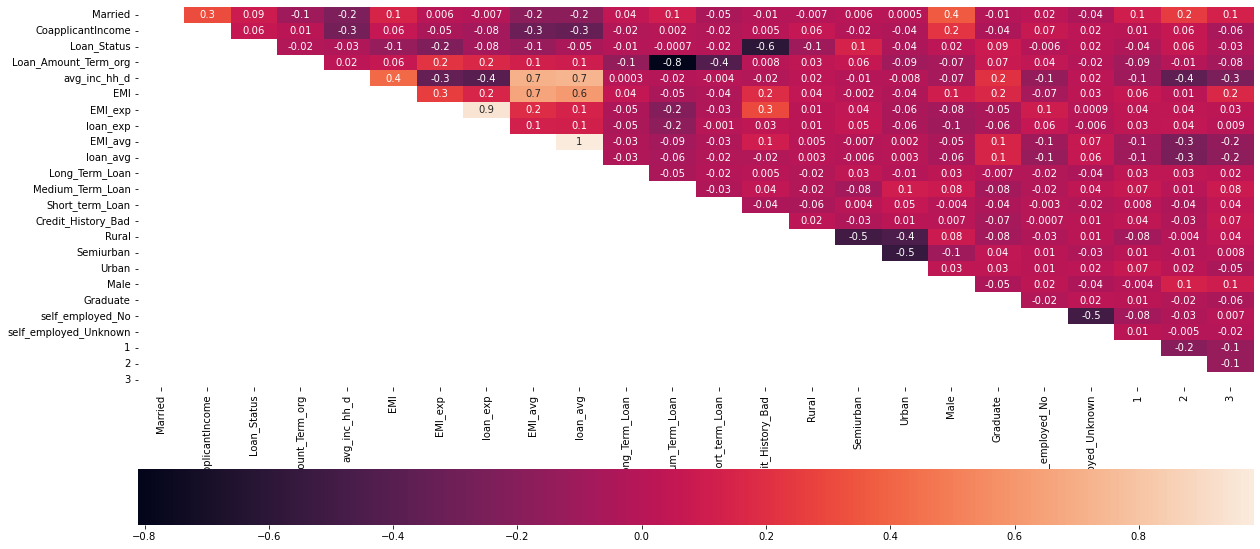

In [42]:
plt.figure(figsize = (20,10))
upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))
sns.heatmap(upper, annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

In [44]:
to_rmv = ['loan_exp','Loan_Amount_Term_org','avg_inc_hh_d']
train_2 = train_2.drop(to_rmv, axis = 1, inplace  = False)
test_2 = test_2.drop(to_rmv, axis = 1, inplace  = False)

/tmp/ipykernel_252138/3493976062.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))


<AxesSubplot:>

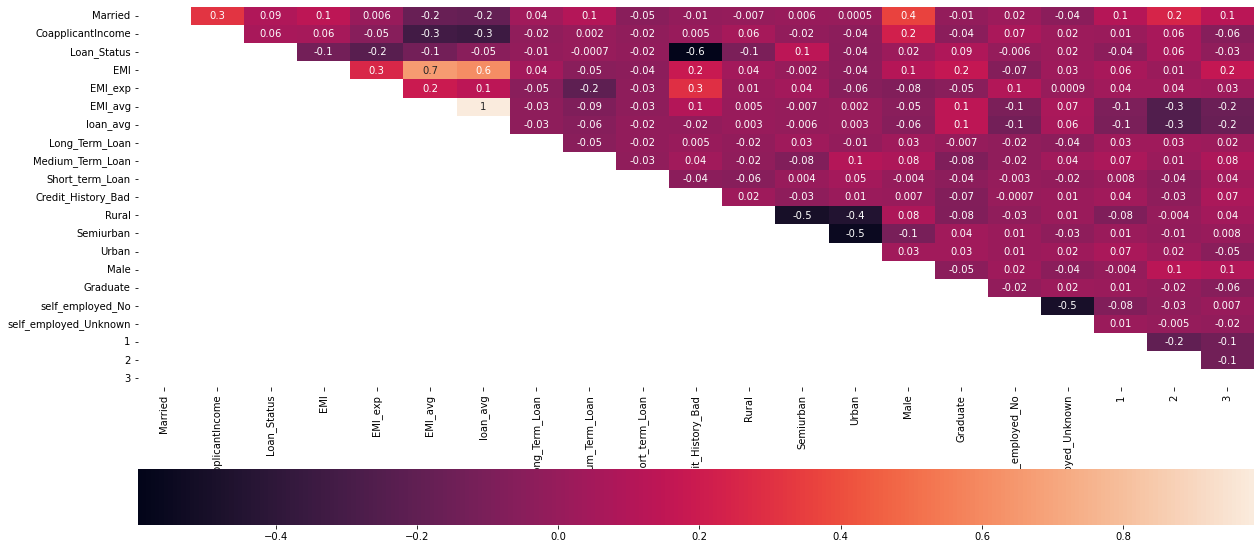

In [45]:
plt.figure(figsize = (20,10))
upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))
sns.heatmap(upper, annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

In [46]:
to_rmv = ['EMI_avg']
train_2 = train_2.drop(to_rmv, axis = 1, inplace  = False)
test_2 = test_2.drop(to_rmv, axis = 1, inplace  = False)

/tmp/ipykernel_252138/3493976062.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))


<AxesSubplot:>

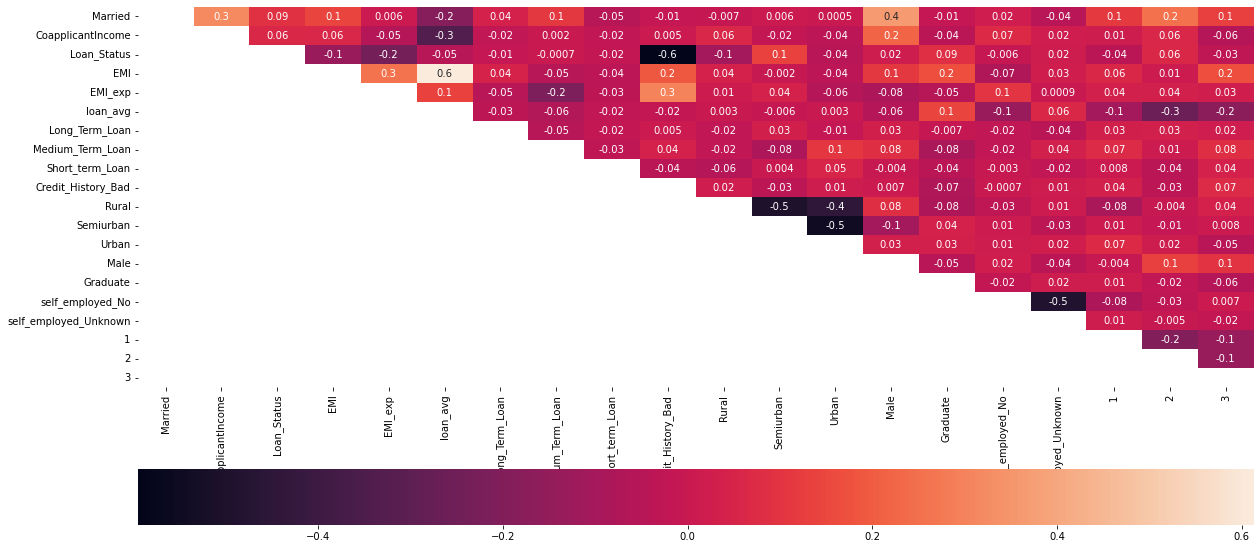

In [47]:
plt.figure(figsize = (20,10))
upper = train_2.corr().where(np.triu(np.ones(train_2.corr().shape), k=1).astype(np.bool))
sns.heatmap(upper, annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

In [48]:
train_2.columns

Index(['Loan_ID', 'Married', 'CoapplicantIncome', 'Loan_Status', 'EMI',
       'EMI_exp', 'loan_avg', 'Long_Term_Loan', 'Medium_Term_Loan',
       'Short_term_Loan', 'Credit_History_Bad', 'Rural', 'Semiurban', 'Urban',
       'Male', 'Graduate', 'self_employed_No', 'self_employed_Unknown', '1',
       '2', '3'],
      dtype='object')

#### Checking distribution of Loan approval accross various variables

In [53]:
to_count = ['Married',
       'Long_Term_Loan', 'Medium_Term_Loan',
       'Short_term_Loan', 'Credit_History_Bad',
       'Rural', 'Semiurban', 'Urban', 'Male', 'Graduate', 'self_employed_No',
       'self_employed_Unknown', '1', '2', '3']

Distribution of Married by Loan Status


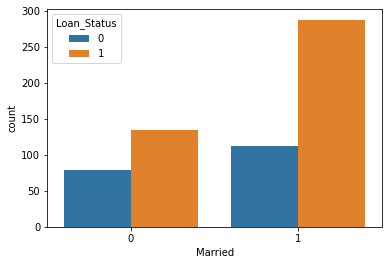

Distribution of Long_Term_Loan by Loan Status


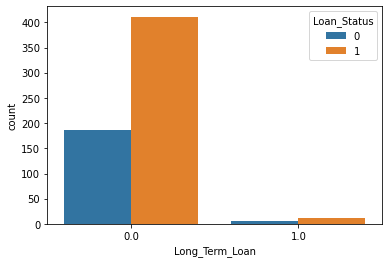

Distribution of Medium_Term_Loan by Loan Status


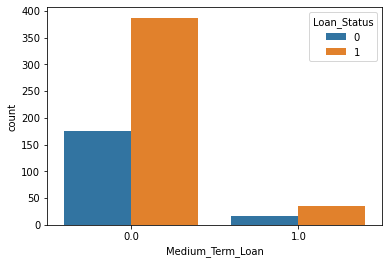

Distribution of Short_term_Loan by Loan Status


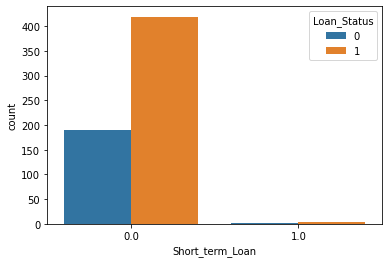

Distribution of Credit_History_Bad by Loan Status


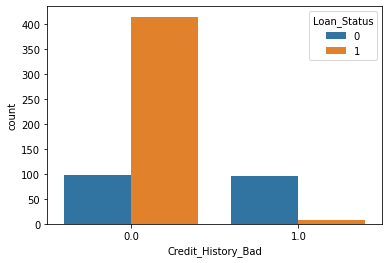

Distribution of Rural by Loan Status


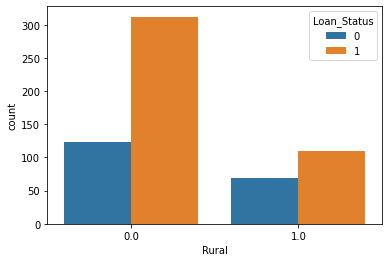

Distribution of Semiurban by Loan Status


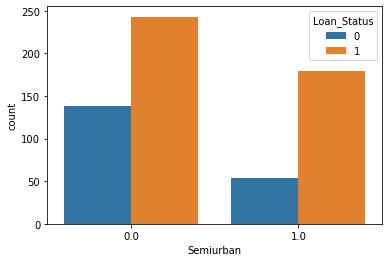

Distribution of Urban by Loan Status


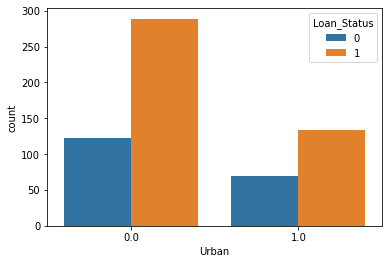

Distribution of Male by Loan Status


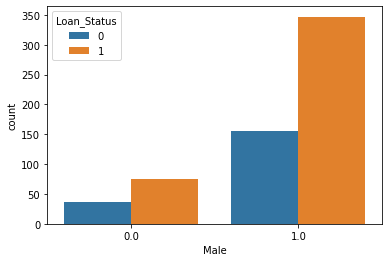

Distribution of Graduate by Loan Status


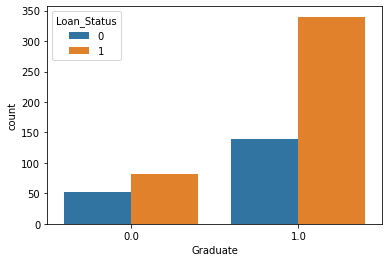

Distribution of self_employed_No by Loan Status


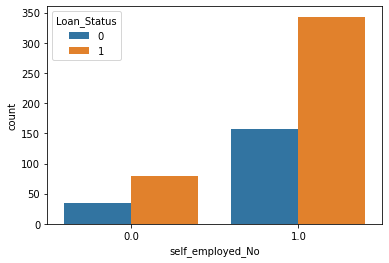

Distribution of self_employed_Unknown by Loan Status


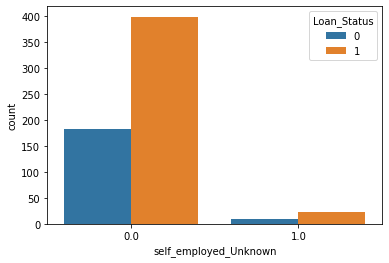

Distribution of 1 by Loan Status


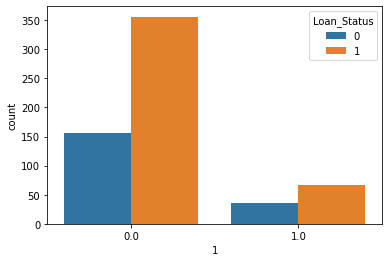

Distribution of 2 by Loan Status


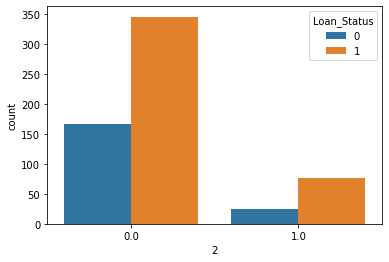

Distribution of 3 by Loan Status


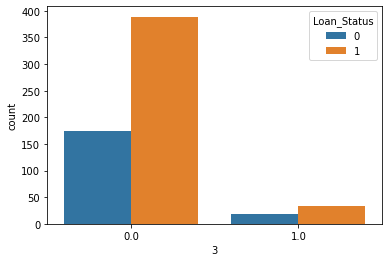

In [54]:
for col in to_count:
    print('Distribution of {} by Loan Status'.format(col))
    sns.countplot(x = col, hue = 'Loan_Status', data = train_2)
    plt.show()

#### Saving final files for modelling 

In [55]:
train_2.to_csv('../data/train_to_model.csv',index = False)
test_2.to_csv('../data/test_to_model.csv',index = False)